In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

%matplotlib inline

# Loading in my data

In [2]:
ames_housing = pd.read_csv('../datasets/train.csv')

# Checking to see if read in correctly

In [3]:
# Checking to see if data has been read in correctly
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
ames_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

# Picking values that I think would be helpful with affecting the price

In [6]:
# Columns with Square Feet as their values
# Lot Area, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF
# 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area
# Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area

### Going to check if all the square foot columns have values

In [7]:
ames_housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [8]:
# Lot Area
sqft_check_for_null = ['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
                       'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']
ames_housing[sqft_check_for_null].isnull().sum()

Lot Area            0
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Garage Area         1
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
dtype: int64

In [9]:
# Checking out Mas Vnr Area and what it looks like.
ames_housing.loc[(ames_housing['Mas Vnr Area']).isna(), :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,New,199900
844,1840,533208030,120,FV,30.0,5330,Pave,Pave,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,New,207500


In [10]:
ames_housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [11]:
# Looking at the value_counts of the Mas Vnr Type there are exactly 22 that don't have that vaneer typ3
# So replacing the null values with 0 to correspond with that
ames_housing.loc[
    (ames_housing['Mas Vnr Area']).isna(), :] = ames_housing.loc[
    (ames_housing['Mas Vnr Area']).isna(), :].fillna(0)

In [12]:
ames_housing['Mas Vnr Area'].isnull().sum()

0

In [13]:
# Checking to see if data looks good
ames_housing.loc[[22]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,7,2006,New,344133


In [14]:
ames_housing['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
0             1
Name: Garage Type, dtype: int64

In [15]:
ames_housing.loc[(ames_housing['Garage Area']).isna(), :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [16]:
# After checking all the values in the columns it is safe to say it is ok to replace all values with 0
ames_housing.loc[[1712]] = ames_housing.loc[(ames_housing["Garage Area"]).isna(), :].fillna(0)

In [17]:
ames_housing['Garage Area'].isna().sum()

0

In [18]:
ames_housing.loc[[1712]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,0,Reg,Lvl,...,0,0,0,MnPrv,0,0,3,2007,WD,150909


In [19]:
# Checking to see how the basements measure up.
basements = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
ames_housing[basements].head(10)

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,533.0,0.0,192.0,725.0
1,637.0,0.0,276.0,913.0
2,731.0,0.0,326.0,1057.0
3,0.0,0.0,384.0,384.0
4,0.0,0.0,676.0,676.0
5,247.0,713.0,557.0,1517.0
6,547.0,0.0,0.0,547.0
7,1000.0,0.0,188.0,1188.0
8,292.0,0.0,632.0,924.0
9,650.0,0.0,390.0,1040.0


In [20]:
ames_housing[basements].isnull().sum()

BsmtFin SF 1     1
BsmtFin SF 2     1
Bsmt Unf SF      1
Total Bsmt SF    1
dtype: int64

In [21]:
# Checking for nulls in Total Bsme SQFT
ames_housing['Total Bsmt SF'].isnull().sum()

1

In [22]:
# Checking how many 0 values there are
(ames_housing['Total Bsmt SF'] == 0).sum()

54

In [23]:
# Trying to find where that null row is because it had a completey empty value.
ames_housing.loc[(ames_housing["Total Bsmt SF"]).isna(), :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [24]:
# Seeing how to call row as a DF instead of series
ames_housing.loc[[1327]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [25]:
# I am assuming that a lot of the empty rows have empty values so I am filling them all with 0.
# Also assuming since they are empty they don't have those values
# It is a one story house
ames_housing.loc[[1327]] = ames_housing.loc[(ames_housing["Total Bsmt SF"]).isna(), :].fillna(int(0))

In [26]:
# Checking to see of my code worked
ames_housing.loc[(ames_housing["Total Bsmt SF"]).isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [27]:
ames_housing['Total Bsmt SF'].isnull().sum()

0

In [28]:
# Again checking to see if the value was filled to 0
(ames_housing['Total Bsmt SF'] == 0).sum()

55

In [29]:
# Checking to see of any null values
ames_housing['Bsmt Unf SF'].isnull().sum()

0

In [30]:
# Checking if all the nulls were replaced for all SQFT values
ames_housing[sqft_check_for_null].isnull().sum()

Lot Area           0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
dtype: int64

In [31]:
# Creating a feature engineered column. How much the percentage of a basement is unfurnished

ames_housing['unfurnished_bsmt_percentage'] = ames_housing['Bsmt Unf SF'] / ames_housing['Total Bsmt SF']

In [32]:
ames_housing['unfurnished_bsmt_percentage'].mean()

0.5529146605424067

In [33]:
ames_housing['unfurnished_bsmt_percentage'].isnull().sum()

55

In [34]:
ames_housing.loc[(
    ames_housing['unfurnished_bsmt_percentage']).isna(), 
                ['unfurnished_bsmt_percentage']] = ames_housing.loc[
                                                  (ames_housing['unfurnished_bsmt_percentage']).isna(), 
                                                               ['unfurnished_bsmt_percentage']].fillna(int(0))

In [35]:
ames_housing['unfurnished_bsmt_percentage'].isnull().sum()

0

In [36]:
 ames_housing.loc[ames_housing['unfurnished_bsmt_percentage'] == 0, :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,New,140000,0.0
12,807,906226060,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,131000,0.0
24,2339,527250040,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,1,2006,WD,145000,0.0
32,2517,533250130,120,RL,30.0,9549,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,270000,0.0
42,983,923275040,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,165500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,2826,908186060,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,145000,0.0
2005,2595,535355100,50,RL,50.0,7000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,COD,112000,0.0
2007,980,923228230,160,RM,21.0,2217,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2009,WD,88000,0.0
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,10,2006,WD,51689,0.0


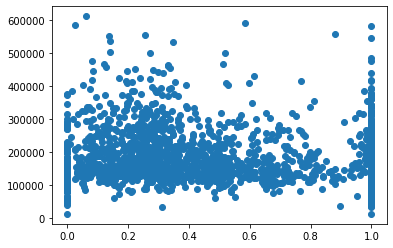

In [37]:
plt.scatter(ames_housing['unfurnished_bsmt_percentage'], ames_housing['SalePrice'])

In [38]:
(ames_housing['unfurnished_bsmt_percentage'] >= .5).sum()

973

In [39]:
(ames_housing['unfurnished_bsmt_percentage'] <= .5).sum()

1096

In [40]:
ames_housing['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [41]:
ames_housing['Street'].isnull().sum()

0

In [42]:
# Turning 'Street' into dummy variables as to say if the street is pavement vs gravel
pd.get_dummies(ames_housing, columns=['Street'], drop_first=True)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,Street_Pave
0,109,533352170,60,RL,NaN,13517,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,130500,0.264828,1
1,544,531379050,60,RL,43.0,11492,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,220000,0.302300,1
2,153,535304180,20,RL,68.0,7922,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,109000,0.308420,1
3,318,916386060,60,RL,73.0,9802,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,174000,1.000000,1
4,255,906425045,50,RL,82.0,14235,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,138500,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,298751,0.463376,1
2047,785,905377130,30,RL,NaN,12342,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2009,WD,82500,0.695703,1
2048,916,909253010,50,RL,57.0,7558,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,3,2009,WD,177000,1.000000,1
2049,639,535179160,20,RL,80.0,10400,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2009,WD,144000,0.245833,1


In [43]:
# Looks like the top four values are in the range of 5-8
ames_housing['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

In [44]:
ames_housing['Overall Qual'].isnull().sum()

0

In [45]:
# Overall condition of the houses are very similar in order of Quality, but not as spread out as evenly
# Also there are no 10's!!
ames_housing['Overall Cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

In [46]:
ames_housing['Overall Cond'].isnull().sum()

0

In [47]:
ames_housing['Utilities'].isnull().sum()

0

In [48]:
ames_housing['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [49]:
# Checking to see if Gr Liv area is the total of all square footage of living space.
# Gr Liv area is the total for 1st Flr SF, 2nd Flr SF, and Low Qual Fin SF
# It looks as though Total Bsmt SF is not included in that
living_area_sqft = ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Total Bsmt SF', 'Gr Liv Area']
ames_housing[living_area_sqft].sort_values('Low Qual Fin SF', ascending=False).head()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Total Bsmt SF,Gr Liv Area
828,1313,0,1064,1313.0,2377
1239,1272,0,697,1272.0,1969
1035,1518,1518,572,1107.0,3608
320,854,0,528,720.0,1382
858,1440,1440,515,1440.0,3395


In [50]:
ames_housing[living_area_sqft].isnull().sum()

1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Total Bsmt SF      0
Gr Liv Area        0
dtype: int64

In [51]:
ames_housing[living_area_sqft].describe()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Total Bsmt SF,Gr Liv Area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1164.488055,329.329108,5.512921,1057.471965,1499.330083
std,396.446923,425.671046,51.068870,449.908003,500.447829
min,334.000000,0.000000,0.000000,0.000000,334.000000
25%,879.500000,0.000000,0.000000,793.000000,1129.000000
50%,1093.000000,0.000000,0.000000,994.000000,1444.000000
75%,1405.000000,692.500000,0.000000,1318.500000,1728.500000
max,5095.000000,1862.000000,1064.000000,6110.000000,5642.000000


In [52]:
# Feature engineering a new column. I suspect that Total Bsmt SF is not included in Gr Liv Area
# So I am going to add the two together to get the full square footage of home
ames_housing['gr_liv_area_and_total_bsmt'] = ames_housing['Total Bsmt SF'] + ames_housing['Gr Liv Area']

In [53]:
# Checking to see if it worked
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,130500,0.264828,2204.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,4,2009,WD,220000,0.302300,3035.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,1,2010,WD,109000,0.308420,2114.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,174000,1.000000,1828.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,138500,1.000000,2121.0


In [54]:
# Checking the bathrooms now!
# Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath
bathrooms_check = ['Half Bath', 'Full Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']
ames_housing[bathrooms_check].isnull().sum()

Half Bath         0
Full Bath         0
Bsmt Full Bath    1
Bsmt Half Bath    1
dtype: int64

In [55]:
ames_housing.loc[ames_housing['Bsmt Full Bath'].isnull()] = ames_housing.loc[
                ames_housing['Bsmt Full Bath'].isnull()].fillna(0)

In [56]:
ames_housing.loc[
                ames_housing['Half Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt


In [57]:
ames_housing[bathrooms_check].isnull().sum()

Half Bath         0
Full Bath         0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

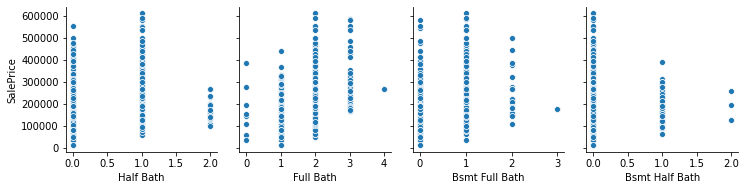

In [58]:
sns.pairplot(ames_housing, x_vars=['Half Bath', 'Full Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'],
                                    y_vars=['SalePrice']);

In [59]:
# Creating a feature engineered column to see what would happen if all baths were counted up
abv_bathrooms = ames_housing['Half Bath'] + ames_housing['Full Bath']
bsmt_bathrooms = ames_housing['Bsmt Full Bath'] + ames_housing['Bsmt Half Bath']
all_bathrooms = abv_bathrooms + bsmt_bathrooms

all_bathrooms

0       3.0
1       4.0
2       2.0
3       3.0
4       2.0
       ... 
2046    3.0
2047    1.0
2048    2.0
2049    2.0
2050    3.0
Length: 2051, dtype: float64

In [60]:
ames_housing['all_bathrooms'] = all_bathrooms

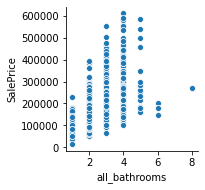

In [61]:
sns.pairplot(ames_housing, x_vars=['all_bathrooms'],
                                    y_vars=['SalePrice']);

In [62]:
ames_housing['Bedroom AbvGr'].isnull().sum()

0

In [63]:
ames_housing['Bedroom AbvGr'].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

In [64]:
ames_housing['Kitchen AbvGr'].value_counts()

1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

In [65]:
ames_housing['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [66]:
# Changing the values of 'Kitchen Qual' so they are numerical. 5 being the best and 1 being the worst
def poor_to_excellent(column):
    if column == 'Ex':
        return 5
    elif column == 'Gd':
        return 4
    elif column == 'TA':
        return 3
    elif column == 'Fa':
        return 2
    else:
        return 1

In [67]:
ames_housing['Kitchen Qual'] = ames_housing['Kitchen Qual'].map(poor_to_excellent)

In [68]:
ames_housing['Kitchen Qual'].value_counts()

3    1047
4     806
5     151
2      47
Name: Kitchen Qual, dtype: int64

In [69]:
ames_housing['Kitchen Qual'].describe()

count    2051.000000
mean        3.517309
std         0.665577
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Kitchen Qual, dtype: float64

In [70]:
ames_housing['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [71]:
ames_housing['Exter Qual'] = ames_housing['Exter Qual'].map(poor_to_excellent)

In [72]:
ames_housing['Exter Qual'].value_counts()

3    1247
4     697
5      81
2      26
Name: Exter Qual, dtype: int64

In [73]:
ames_housing['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [74]:
ames_housing['Exter Cond'] = ames_housing['Exter Cond'].map(poor_to_excellent)

In [75]:
ames_housing['Exter Cond'].value_counts()

3    1778
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

In [76]:
ames_housing['Heating QC'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [77]:
ames_housing['Heating QC'] = ames_housing['Heating QC'].map(poor_to_excellent)

In [78]:
ames_housing['Heating QC'].value_counts()

5    1065
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

In [79]:
bsmt_quality_var = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure']
ames_housing[bsmt_quality_var].isnull().sum()

Bsmt Qual        53
Bsmt Cond        53
Bsmt Exposure    56
dtype: int64

In [80]:
ames_housing['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
0       2
Po      1
Name: Bsmt Qual, dtype: int64

In [81]:
(ames_housing['Bsmt Qual'] == 0).sum()

2

In [82]:
(ames_housing['Bsmt Cond'] == 0).sum()

2

In [83]:
ames_housing['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
0        2
Name: Bsmt Cond, dtype: int64

In [84]:
(ames_housing['Bsmt Exposure'] == 0).sum()

2

In [85]:
ames_housing['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
0        2
Name: Bsmt Exposure, dtype: int64

In [86]:
ames_housing.loc[ames_housing['Bsmt Exposure'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
12,807,906226060,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,...,NaN,NaN,0,6,2009,WD,131000,0.0,2016.0,1.0
93,811,906226100,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,GdPrv,NaN,0,6,2009,WD,118858,0.0,1535.0,2.0
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,6,2009,WD,63900,0.0,660.0,1.0
146,888,908128060,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,7,2009,ConLD,198500,0.0,1922.0,3.0
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,NaN,NaN,0,2,2008,WD,13100,0.0,733.0,1.0
240,2740,905451050,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2006,WD,135000,0.0,1488.0,1.0
249,2242,910206010,50,RM,64.0,11067,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,3,2007,WD,68104,0.0,845.0,1.0
256,2745,905477010,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2006,WD,93000,0.0,1124.0,1.0
390,84,532351140,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,112000,0.0,1902.0,2.0
437,1501,908201100,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,6,2008,WD,82000,0.0,1152.0,2.0


In [87]:
# Looking up why the basement exposure has three extra null values
# Looks like there is a basement in these three homes
# Since most homes have No (No Exposure) I am going to assume these have no exposure as well
ames_housing.loc[(ames_housing['BsmtFin Type 1'] == 'Unf') & 
                 (ames_housing['Bsmt Exposure'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,7,2007,New,212109,1.0,2313.0,3.0
1547,67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,5,2010,WD,221500,1.0,3190.0,2.0
1997,2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,2,2006,WD,192500,1.0,2712.0,3.0


In [88]:
# Changing empty values in the exposure to No
ames_housing.loc[(ames_housing['BsmtFin Type 1'] == 'Unf') & 
                 (ames_housing['Bsmt Exposure'].isnull()),
                ['Bsmt Exposure']] = ames_housing.loc[
                 (ames_housing['BsmtFin Type 1'] == 'Unf') & 
                 (ames_housing['Bsmt Exposure'].isnull()),
                  ['Bsmt Exposure']].fillna('No')

In [89]:
ames_housing.loc[(ames_housing['BsmtFin Type 1'] == 'Unf') & 
                 (ames_housing['Bsmt Exposure'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms


In [90]:
# Just double checking
ames_housing.loc[[1456]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,7,2007,New,212109,1.0,2313.0,3.0


In [91]:
bsmt_quality_var = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure']
ames_housing[bsmt_quality_var].isnull().sum()

Bsmt Qual        53
Bsmt Cond        53
Bsmt Exposure    53
dtype: int64

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
 ames_housing.loc[ames_housing['Bsmt Qual'].isnull(), ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure']].fillna('NA')

,Bsmt Qual,Bsmt Cond,Bsmt Exposure
12,NA,NA,NA
93,NA,NA,NA
114,NA,NA,NA
146,NA,NA,NA
183,NA,NA,NA
240,NA,NA,NA
249,NA,NA,NA
256,NA,NA,NA
390,NA,NA,NA
437,NA,NA,NA


In [94]:
ames_housing.loc[ames_housing['Bsmt Qual'].isnull(), 
                             ['Bsmt Qual', 
                              'Bsmt Cond',
                              'Bsmt Exposure']] = ames_housing.loc[
                                                  ames_housing['Bsmt Qual'].isnull(), 
                                                              ['Bsmt Qual', 
                                                               'Bsmt Cond',
                                                               'Bsmt Exposure']].fillna('NA')

In [95]:
ames_housing.loc[ames_housing['Bsmt Cond'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms


In [96]:
ames_housing[bsmt_quality_var].isnull().sum()

Bsmt Qual        0
Bsmt Cond        0
Bsmt Exposure    0
dtype: int64

In [97]:
ames_housing['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      53
Po       5
Ex       3
0        2
Name: Bsmt Cond, dtype: int64

In [98]:
ames_housing.loc[
    (ames_housing['Bsmt Qual'] == 0), 
    ['Bsmt Qual', 
     'Bsmt Cond', 
     'Bsmt Exposure']] = ames_housing.loc[
                        (ames_housing['Bsmt Qual'] == 0), 
                        ['Bsmt Qual', 
                         'Bsmt Cond', 
                         'Bsmt Exposure']].replace(0, 'NA')

In [99]:
# Creating a function to change the qualitative values in to quantitative
# There are 4 colummns with the same column values
# Bsmt Qual, Bsmt Cond, Garage Qual, & Garage Cond
def none_to_excellent(column):
    if column == 'Ex':
        return 5
    elif column == 'Gd':
        return 4
    elif column == 'TA':
        return 3
    elif column == 'Fa':
        return 2
    elif column == 'Po':
        return 1
    else:
        return 0

In [100]:
ames_housing['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [101]:
ames_housing['Bsmt Cond'] = ames_housing['Bsmt Cond'].map(none_to_excellent)

In [102]:
ames_housing['Bsmt Cond'].value_counts()

3    1834
4      89
2      65
0      55
1       5
5       3
Name: Bsmt Cond, dtype: int64

In [103]:
ames_housing['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: Bsmt Qual, dtype: int64

In [104]:
ames_housing['Bsmt Qual'] = ames_housing['Bsmt Qual'].map(none_to_excellent)

In [105]:
ames_housing['Bsmt Qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

In [106]:
garage_qual_cond = ['Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish', 'Garage Area', 'Garage Type']
ames_housing[garage_qual_cond].isnull().sum()

Garage Qual      112
Garage Cond      112
Garage Yr Blt    112
Garage Finish    112
Garage Area        0
Garage Type      112
dtype: int64

In [107]:
ames_housing['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
0        2
Name: Garage Qual, dtype: int64

In [108]:
ames_housing.loc[ames_housing['Garage Qual'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,2,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,3,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600,1.000000,2948.0,2.0
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,5,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000,0.677656,1638.0,2.0
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,5,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,3,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000,0.816071,2240.0,1.0
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,4,BrkTil,3,1,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,5,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850,1.000000,2537.0,2.0
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,5,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,3,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000,0.340909,1133.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,3,3,CBlock,3,3,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,3,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,3,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,139000,1.000000,2736.0,4.0
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,Slab,0,0,NA,NaN,0.0,NaN,0.0,0.0,0.0,GasA,3,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,3,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689,0.000000,729.0,1.0
2027,2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,3,CBlock,3,2,No,

In [109]:
# Filling in the empty columns with NA
ames_housing.loc[ames_housing['Garage Qual'].isnull(), 
                             ['Garage Qual', 
                              'Garage Cond',
                              'Garage Finish',
                              'Garage Type']] = ames_housing.loc[
                                                  ames_housing['Garage Qual'].isnull(), 
                                                              ['Garage Qual', 
                                                               'Garage Cond',
                                                               'Garage Finish',
                                                               'Garage Type']].fillna('NA')

In [110]:
ames_housing[garage_qual_cond].isnull().sum()

Garage Qual        0
Garage Cond        0
Garage Yr Blt    112
Garage Finish      0
Garage Area        0
Garage Type        0
dtype: int64

In [111]:
ames_housing['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          112
Basment      27
2Types       19
CarPort      11
0             1
Name: Garage Type, dtype: int64

In [112]:
ames_housing['Garage Qual'].value_counts()

TA    1832
NA     112
Fa      82
Gd      18
Ex       3
Po       2
0        2
Name: Garage Qual, dtype: int64

In [113]:
ames_housing['Garage Cond'].value_counts()

TA    1868
NA     112
Fa      47
Gd      12
Po       8
Ex       2
0        2
Name: Garage Cond, dtype: int64

In [114]:
ames_housing['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     112
0        2
Name: Garage Finish, dtype: int64

In [115]:
ames_housing['Garage Yr Blt'].value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1933.0      1
1919.0      1
1896.0      1
1895.0      1
1918.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [116]:
ames_housing.loc[ames_housing['Garage Qual'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,2,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,3,9,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600,1.000000,2948.0,2.0
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,5,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000,0.677656,1638.0,2.0
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,5,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,3,6,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000,0.816071,2240.0,1.0
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,4,BrkTil,3,1,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,5,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850,1.000000,2537.0,2.0
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,5,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,3,5,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000,0.340909,1133.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,3,3,CBlock,3,3,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,3,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,3,8,Typ,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,139000,1.000000,2736.0,4.0
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,Slab,0,0,NA,NaN,0.0,NaN,0.0,0.0,0.0,GasA,3,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,3,5,Mod,0,NaN,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689,0.000000,729.0,1.0
2027,2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,3,CBlock,3,2,No,Unf,0.0,Unf,0.0,1556.0,1556.

In [117]:
# Replacing the zeros with NA
ames_housing.loc[
    (ames_housing['Garage Qual'] == 0), 
    ['Garage Qual', 
     'Garage Cond', 
     'Garage Finish',
     'Garage Type']] = ames_housing.loc[
                        (ames_housing['Garage Qual'] == 0), 
                                     ['Garage Qual', 
                                      'Garage Cond', 
                                      'Garage Finish',
                                      'Garage Type']].replace(0, 'NA')

In [118]:
ames_housing['Garage Qual'].value_counts()

TA    1832
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [119]:
ames_housing['Garage Cond'].value_counts()

TA    1868
NA     114
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [120]:
ames_housing['Garage Type'].isnull().sum()

0

In [121]:
ames_housing['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     114
Name: Garage Finish, dtype: int64

In [122]:
def garage_finish(finish):
    if finish == 'Fin':
        return 3
    elif finish == 'RFn':
        return 2
    elif finish == 'Unf':
        return 1
    else:
         return 0

In [123]:
ames_housing['Garage Finish'] = ames_housing['Garage Finish'].map(garage_finish)

In [124]:
ames_housing['Garage Finish'].value_counts()

1    849
2    579
3    509
0    114
Name: Garage Finish, dtype: int64

In [125]:
ames_housing['Garage Qual'] = ames_housing['Garage Qual'].map(none_to_excellent)

In [126]:
ames_housing['Garage Qual'].value_counts()

3    1832
0     114
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

In [127]:
ames_housing['Garage Cond'] = ames_housing['Garage Cond'].map(none_to_excellent)

In [128]:
ames_housing['Garage Cond'].value_counts()

3    1868
0     114
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64

In [129]:
ames_housing['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [130]:
ames_housing['Garage Yr Blt'].isnull().sum()

112

In [131]:
ames_housing['Garage Yr Blt'] = ames_housing['Garage Yr Blt'].fillna(0)

In [132]:
ames_housing['Garage Yr Blt'].isnull().sum()

0

In [133]:
ames_housing['Garage Cars'].isnull().sum()

0

In [134]:
ames_housing.loc[:, ['Garage Qual', 
                     'Garage Cond', 
                     'Garage Yr Blt', 
                     'Garage Finish', 
                     'Garage Area', 
                     'Garage Type']]

,Garage Qual,Garage Cond,Garage Yr Blt,Garage Finish,Garage Area,Garage Type
0,3,3,1976.0,2,475.0,Attchd
1,3,3,1997.0,2,559.0,Attchd
2,3,3,1953.0,1,246.0,Detchd
3,3,3,2007.0,3,400.0,BuiltIn
4,3,3,1957.0,1,484.0,Detchd
...,...,...,...,...,...,...
2046,3,3,2007.0,3,520.0,Attchd
2047,3,3,1961.0,1,539.0,Detchd
2048,2,2,1929.0,1,342.0,Detchd
2049,3,3,1956.0,1,294.0,Attchd


In [135]:
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NaN,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0.264828,2204.0,3.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0.302300,3035.0,4.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,NaN,Detchd,1953.0,1,1.0,246.0,3,3,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0.308420,2114.0,2.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,NaN,BuiltIn,2007.0,3,2.0,400.0,3,3,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,1.000000,1828.0,3.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,Detchd,1957.0,1,2.0,484.0,3,3,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,1.000000,2121.0,2.0


In [136]:
ames_housing["Bsmt Exposure"].value_counts()

No    1342
Av     288
Gd     203
Mn     163
NA      55
Name: Bsmt Exposure, dtype: int64

In [137]:
def change_bsmt_exposure(bsmt):
    if bsmt == 'Gd':
        return 4
    elif bsmt == 'Av':
        return 3
    elif bsmt == 'Mn':
        return 2
    elif bsmt == 'No':
        return 1
    else:
        return 0 

In [138]:
ames_housing['Bsmt Exposure'] = ames_housing['Bsmt Exposure'].map(change_bsmt_exposure)

In [139]:
ames_housing["Bsmt Exposure"].value_counts()

1    1342
3     288
4     203
2     163
0      55
Name: Bsmt Exposure, dtype: int64

In [140]:
ames_housing['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
0        2
Name: BsmtFin Type 1, dtype: int64

In [141]:
ames_housing['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
0         2
Name: BsmtFin Type 2, dtype: int64

In [142]:
ames_housing['BsmtFin Type 1'].isnull().sum()

53

In [143]:
ames_housing['BsmtFin Type 2'].isnull().sum()

54

In [144]:
# Looking to see what it most common for 'GLQ' in Basement Fin Type 2
# Creating a variable name to see what the mean is
basement_2_GLQ = ames_housing.loc[(ames_housing['BsmtFin Type 1'] == 'GLQ') & (ames_housing['BsmtFin Type 2']), 
                                               ['BsmtFin Type 2']]

In [145]:
basement_2_GLQ['BsmtFin Type 2'].value_counts()

Unf    569
Rec     17
ALQ     11
LwQ     11
BLQ      6
Name: BsmtFin Type 2, dtype: int64

In [146]:
# Inputing a value in the one column that has a np.nan in BsmtFin Type 2
# That one row actually had a basement and a lot of other information
# Based on the information I put that it is 'Unf'
ames_housing.loc[(ames_housing['BsmtFin Type 1'] == 'GLQ') & 
                 (ames_housing['BsmtFin Type 2'].isnull()),
                 ['BsmtFin Type 2']] = ames_housing.loc[
                                      (ames_housing['BsmtFin Type 1'] == 'GLQ') & 
                                      (ames_housing['BsmtFin Type 2'].isnull()),
                                      ['BsmtFin Type 2']].replace(np.nan, 'Unf')

In [147]:
print("Bsmt 1 nulls", ames_housing['BsmtFin Type 1'].isnull().sum())
print("Bsmt 2 nulls", ames_housing['BsmtFin Type 2'].isnull().sum())

Bsmt 1 nulls 53
Bsmt 2 nulls 53


In [148]:
# Replacing all the null values in the basement Ordinal values
ames_housing.loc[ames_housing['BsmtFin Type 1'].isnull(), 
                             ['BsmtFin Type 1', 
                              'BsmtFin Type 2']] = ames_housing.loc[
                                                   ames_housing['BsmtFin Type 1'].isnull(), 
                                                   ['BsmtFin Type 1', 
                                                    'BsmtFin Type 2']].fillna('NA')

In [149]:
print("Bsmt 1 nulls", ames_housing['BsmtFin Type 1'].isnull().sum())
print("Bsmt 2 nulls", ames_housing['BsmtFin Type 2'].isnull().sum())

Bsmt 1 nulls 0
Bsmt 2 nulls 0


In [150]:
ames_housing['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      53
0        2
Name: BsmtFin Type 1, dtype: int64

In [151]:
ames_housing['BsmtFin Type 2'].value_counts()

Unf    1750
Rec      80
LwQ      60
NA       53
BLQ      48
ALQ      35
GLQ      23
0         2
Name: BsmtFin Type 2, dtype: int64

In [152]:
# Changing the 0 to NA for BsmtFin Type 1 and 2
ames_housing.loc[
    (ames_housing['BsmtFin Type 2'] == 0), 
    ['BsmtFin Type 2', 
     'BsmtFin Type 1']] = ames_housing.loc[
                        (ames_housing['BsmtFin Type 2'] == 0), 
                        ['BsmtFin Type 2', 
                         'BsmtFin Type 1']].replace(0, 'NA')

In [153]:
ames_housing['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: BsmtFin Type 1, dtype: int64

In [154]:
ames_housing['BsmtFin Type 2'].value_counts()

Unf    1750
Rec      80
LwQ      60
NA       55
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [155]:
#  GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
def basement_qualities(basement):
    if basement == 'GLQ':
        return 6
    elif basement == 'ALQ':
        return 5
    elif basement == 'BLQ':
        return 4
    elif basement == 'Rec':
        return 3
    elif basement == 'LwQ':
        return 2
    elif basement == 'Unf':
        return 1
    else:
        return 0

In [156]:
ames_housing['BsmtFin Type 1'] = ames_housing['BsmtFin Type 1'].map(basement_qualities)
ames_housing['BsmtFin Type 2'] = ames_housing['BsmtFin Type 2'].map(basement_qualities)

In [157]:
ames_housing['BsmtFin Type 1'].value_counts()

6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: BsmtFin Type 1, dtype: int64

In [158]:
ames_housing['BsmtFin Type 2'].value_counts()

1    1750
3      80
2      60
0      55
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

In [159]:
ames_housing['Central Air'].isnull().sum()

0

In [160]:
ames_housing['Central Air'].value_counts()

Y    1910
N     141
Name: Central Air, dtype: int64

In [161]:
def change_air(air):
    if air == 'Y':
        return 1
    else:
        return 0

In [162]:
ames_housing['Central Air'] = ames_housing['Central Air'].map(change_air)

In [163]:
ames_housing['Central Air'].value_counts()

1    1910
0     141
Name: Central Air, dtype: int64

# Dealing with Cleaning and Engineering years

In [164]:
the_good_years = ['Yr Sold', 'Mo Sold', 'Year Built', 'Year Remod/Add']

ames_housing[the_good_years].isnull().sum()

Yr Sold           0
Mo Sold           0
Year Built        0
Year Remod/Add    0
dtype: int64

In [165]:
ames_housing['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [166]:
ames_housing['Mo Sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64

In [167]:
ames_housing['Year Built'].value_counts()

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1911      1
1893      1
1885      1
1879      1
1872      1
Name: Year Built, Length: 113, dtype: int64

In [168]:
ames_housing['Year Remod/Add'].value_counts()

1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1952      9
2010      8
1983      7
1981      6
1982      3
Name: Year Remod/Add, Length: 61, dtype: int64

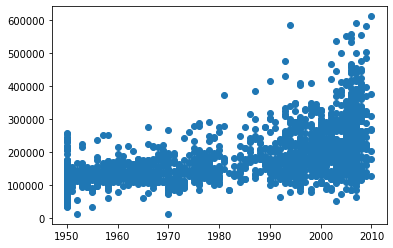

In [169]:
plt.scatter(ames_housing['Year Remod/Add'], ames_housing['SalePrice'])

In [170]:
# Feature engineering a new column
# Looking at scatterplot you can see an increase in higher sale prices when the year of remodel is more recent
ames_housing['yearsold_minus_year_remod'] = ames_housing['Yr Sold'] - ames_housing['Year Remod/Add']

In [171]:
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms,yearsold_minus_year_remod
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NaN,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0.264828,2204.0,3.0,5
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0.302300,3035.0,4.0,12
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,NaN,Detchd,1953.0,1,1.0,246.0,3,3,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0.308420,2114.0,2.0,3
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,NaN,BuiltIn,2007.0,3,2.0,400.0,3,3,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,1.000000,1828.0,3.0,3
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,Detchd,1957.0,1,2.0,484.0,3,3,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,1.000000,2121.0,2.0,17


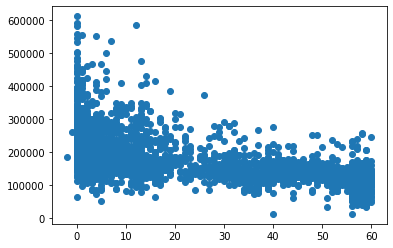

In [172]:
plt.scatter(ames_housing['yearsold_minus_year_remod'], ames_housing['SalePrice'])

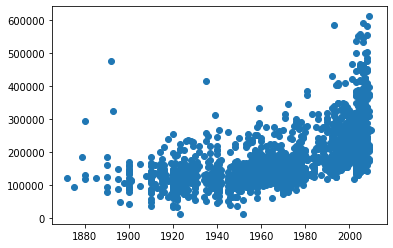

In [173]:
plt.scatter(ames_housing['Year Built'], ames_housing['SalePrice'])

In [174]:
# Looking up if there are tons of values missing in some columns and removing them. 
ames_housing['Pool QC'].isnull().sum()

2017

In [175]:
ames_housing.drop(columns='Pool QC', inplace=True)

In [176]:
ames_housing['Misc Feature'].isnull().sum()

1961

In [177]:
ames_housing.drop(columns='Misc Feature', inplace=True)

In [178]:
ames_housing['Fence'].isnull().sum()

1628

In [179]:
ames_housing.drop(columns='Fence', inplace=True)

In [180]:
(ames_housing['3Ssn Porch'] == 0).sum()


2025

In [181]:
ames_housing.drop(columns='3Ssn Porch', inplace=True)

In [182]:
# (ames_housing['Misc Val'] == 0).sum()
# ames_housing['Misc Val'].isnull().sum()
ames_housing.drop(columns='Misc Val', inplace=True)

In [183]:
(ames_housing['Enclosed Porch'] == 0).sum()
# ames_housing['Enclosed Porch'].isnull().sum()
# ames_housing.drop(columns='Misc Val', inplace=True)

1724

In [184]:
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms,yearsold_minus_year_remod
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NaN,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,3,2010,WD,130500,0.264828,2204.0,3.0,5
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,4,2009,WD,220000,0.302300,3035.0,4.0,12
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,NaN,Detchd,1953.0,1,1.0,246.0,3,3,Y,0,52,0,0,0,1,2010,WD,109000,0.308420,2114.0,2.0,3
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,NaN,BuiltIn,2007.0,3,2.0,400.0,3,3,Y,100,0,0,0,0,4,2010,WD,174000,1.000000,1828.0,3.0,3
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,Detchd,1957.0,1,2.0,484.0,3,3,N,0,59,0,0,0,3,2010,WD,138500,1.000000,2121.0,2.0,17


In [185]:
# Dropping columns that I feel won't help. For example MS Subclass where some of the categories are
# the age of the house. People can't age their home so I feel like that category won't help homeowners.
ames_housing.drop(columns='MS SubClass', inplace=True)

In [186]:
ames_housing.shape

(2051, 79)

In [187]:
ames_housing.loc[ames_housing['Alley'].isnull()]

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms,yearsold_minus_year_remod
0,109,533352170,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NaN,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,3,2010,WD,130500,0.264828,2204.0,3.0,5
1,544,531379050,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,4,2009,WD,220000,0.302300,3035.0,4.0,12
2,153,535304180,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,NaN,Detchd,1953.0,1,1.0,246.0,3,3,Y,0,52,0,0,0,1,2010,WD,109000,0.308420,2114.0,2.0,3
3,318,916386060,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,NaN,BuiltIn,2007.0,3,2.0,400.0,3,3,Y,100,0,0,0,0,4,2010,WD,174000,1.000000,1828.0,3.0,3
4,255,906425045,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,NaN,Detchd,1957.0,1,2.0,484.0,3,3,N,0,59,0,0,0,3,2010,WD,138500,1.000000,2121.0,2.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,3,6,1011.0,1,0.0,873.0,1884.0,GasA,5,1,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,Typ,1,Gd,Attchd,2007.0,3,2.0,520.0,3,3,Y,0,276,0,0,0,1,2008,WD,298751,0.463376,3612.0,3.0,1
2047,785,905377130,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,4,262.0,1,0.0,599.0,861.0,GasA,5,1,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,3,4,Typ,0,NaN,Detchd,1961.0,1,2.0,539.0,3,3,Y,158,0,0,0,0,3,2009,WD,82500,0.695703,1722.0,1.0,59
2048,916,909253010,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,896.0,896.0,GasA,4,1,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,3,9,Typ,1,TA,Detchd,1929.0,1,2.0,342.0,2,2,Y,0,0,0,0,0,3,2009,WD,177000,1.000000,2809.0,2.0,59
2049,639,535179160,RL,80.0,10400,Pave,NaN,Re

In [188]:
ames_housing['Alley'].value_counts()

Grvl    85
Pave    55
0       23
Name: Alley, dtype: int64

In [189]:
ames_housing.groupby('Alley')

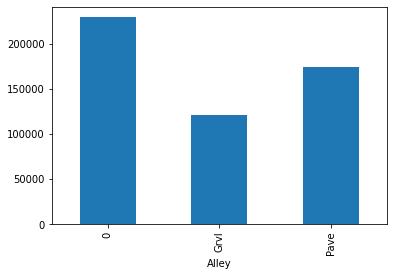

In [190]:
ames_housing.groupby('Alley')['SalePrice'].mean().plot(kind='bar')

In [191]:
ames_housing.drop(columns='Alley', inplace=True)

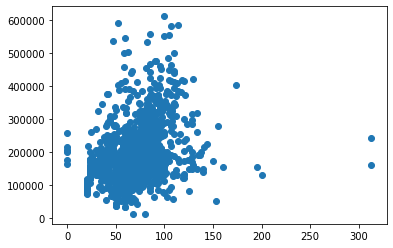

In [192]:
plt.scatter(ames_housing['Lot Frontage'], ames_housing['SalePrice'])

In [193]:
ames_housing['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [194]:
898 + 146 + 6 + 1

1051

In [195]:
523 + 407 + 59 + 62

1051

In [196]:
ames_housing['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
0      10
Name: Fireplace Qu, dtype: int64

In [197]:
ames_housing.loc[
    (ames_housing['Fireplace Qu']).isna(), :] = ames_housing.loc[
                                                (ames_housing['Fireplace Qu']).isna(), :].fillna(0)


In [198]:
ames_housing['Fireplace Qu'].value_counts()

0     1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: Fireplace Qu, dtype: int64

In [199]:
ames_housing.loc[
    (ames_housing['Fireplace Qu'] == 0), 
    ['Fireplace Qu']] = ames_housing.loc[
                       (ames_housing['Fireplace Qu'] == 0), 
                                    ['Fireplace Qu']].replace(0, 'NA')

In [200]:
ames_housing['Fireplace Qu'].value_counts()

NA    1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: Fireplace Qu, dtype: int64

In [201]:
ames_housing['Fireplace Qu'] = ames_housing['Fireplace Qu'].map(none_to_excellent)

In [202]:
ames_housing['Fireplace Qu'].value_counts()

0    1000
4     523
3     407
2      59
5      31
1      31
Name: Fireplace Qu, dtype: int64

In [203]:
ames_housing['Lot Frontage'].isnull().sum()

206

In [204]:
ames_housing.loc[ames_housing['Lot Frontage'] == 0, :]

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,SalePrice,unfurnished_bsmt_percentage,gr_liv_area_and_total_bsmt,all_bathrooms,yearsold_minus_year_remod
0,109,533352170,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,3,2010,WD,130500,0.264828,2204.0,3.0,5
7,145,535154050,RL,0.0,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,3,3,CBlock,3,3,1,3,1000.0,1,0.0,188.0,1188.0,GasA,2,1,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,3,6,Typ,0,0,Attchd,1959.0,2,2.0,531.0,3,3,Y,0,0,0,0,0,5,2010,COD,142000,0.158249,2376.0,2.0,51
8,1942,535353130,RL,0.0,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,1,3,292.0,1,0.0,632.0,924.0,GasA,3,1,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,3,6,Typ,0,0,Detchd,1952.0,1,1.0,420.0,3,3,Y,0,324,0,0,0,6,2007,WD,112500,0.683983,1848.0,1.0,55
23,12,527165230,RL,0.0,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,PConc,4,3,1,5,935.0,1,0.0,233.0,1168.0,GasA,5,1,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,3,6,Typ,0,0,Attchd,1992.0,3,2.0,420.0,3,3,Y,483,21,0,0,0,3,2010,WD,185000,0.199486,2355.0,3.0,3
50,2511,533221080,FV,0.0,2998,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,4,3,PConc,4,3,1,6,353.0,1,0.0,403.0,756.0,GasA,5,1,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,4,4,Typ,0,0,Detchd,2000.0,1,2.0,440.0,3,3,Y,0,32,0,0,0,6,2006,WD,166000,0.533069,2280.0,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,2060,905105170,RL,0.0,8398,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,323.0,3,4,CBlock,3,3,1,2,114.0,4,529.0,300.0,943.0,GasA,3,1,SBrkr,943,0,0,943,1.0,0.0,1,0,2,1,3,5,Typ,0,0,Detchd,1972.0,1,2.0,528.0,3,3,Y,132,0,0,0,0,6,2007,WD,134500,0.318134,1886.0,2.0,40
2003,1151,532353050,RL,0.0,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,3,3,CBlock,3,3,1,5,737.0,1,0.0,175.0,912.0,GasA,3,1,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,3,4,Typ,0,0,Detchd,1962.0,1,1.0,352.0,3,3,Y,140,0,0,176,0,9,2008,WD,144000,0.191886,1824.0,2.0,46
2008,1871,534175010,RL,0.0,11500,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,3,3,CBlock,3,3,1,1,0.0,1,0.0,1680.0,1680.0,GasA,2,1,SBrkr,1680,0,0,1680,0.0,0.0,2,0,4,2,3,8,Typ,0,0,Detchd,1976.0,1,2.0,528.0,3,3,Y,0,0,0,0,0,6,2007,WD,136905,1.000000,3360.0,2.0,31
2016,560,532376110,RL,0.0,7791,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,No

In [205]:
ames_housing.loc[
    (ames_housing['Lot Frontage']).isna(),
                 ['Lot Frontage']] = ames_housing.loc[
                                    (ames_housing['Lot Frontage']).isna(), 
                                                 ['Lot Frontage']].fillna(0)

In [206]:
ames_housing['Lot Frontage'].isnull().sum()

0

In [207]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           2051 non-null   int64  
 1   PID                          2051 non-null   int64  
 2   MS Zoning                    2051 non-null   object 
 3   Lot Frontage                 2051 non-null   float64
 4   Lot Area                     2051 non-null   int64  
 5   Street                       2051 non-null   object 
 6   Lot Shape                    2051 non-null   object 
 7   Land Contour                 2051 non-null   object 
 8   Utilities                    2051 non-null   object 
 9   Lot Config                   2051 non-null   object 
 10  Land Slope                   2051 non-null   object 
 11  Neighborhood                 2051 non-null   object 
 12  Condition 1                  2051 non-null   object 
 13  Condition 2       

In [208]:
pd.set_option('display.max_rows', None)

In [209]:
(ames_housing['Garage Type'] == 'NA').sum()

113

In [210]:
ames_housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
0            22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [211]:
ames_housing.to_csv('../datasets/clean_ames_housing_data.csv', index=False)

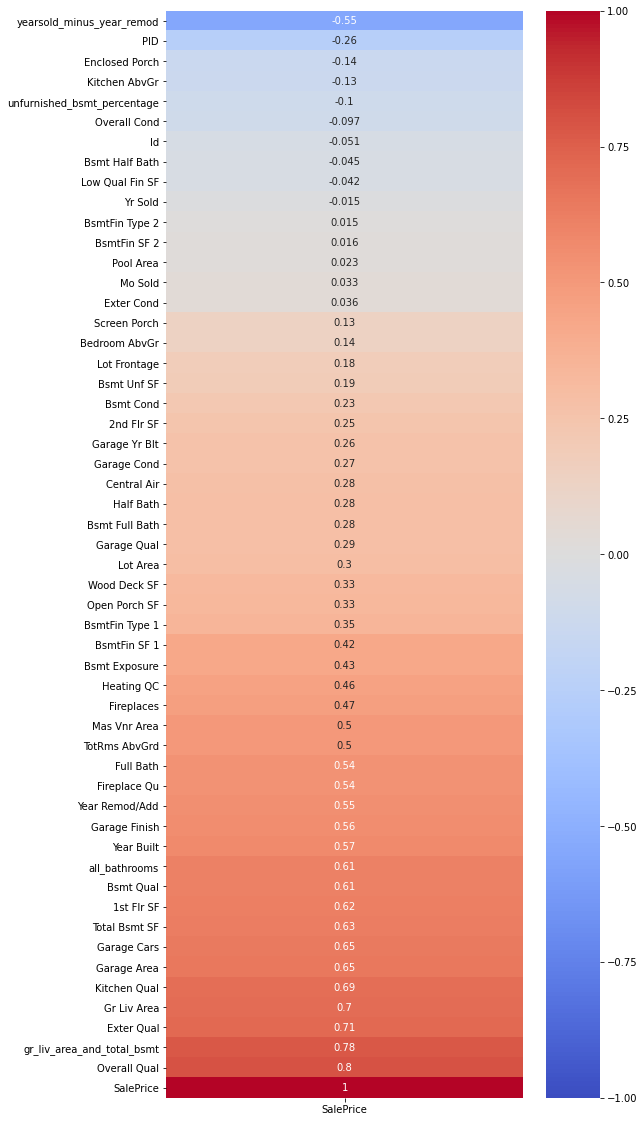

In [212]:
plt.figure(figsize=(8,20))
sns.heatmap(ames_housing.corr()[['SalePrice']].sort_values('SalePrice'),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1);

In [213]:
# Overall Qual, Gr Liv Area, Kitchen Qual, 2nd Flr SF, Garage Area, Garage Cars, all_bathrooms, Bsmt Qual,
# Total Bsmt SF, 1st Flr SF, Year Built, Year Remod/Add, Full Bath, Garage Yr Blt, Mas Vnr Area, TotRms AbvGrd
# Exter Qual, gr_live_area_and_total_bsmt

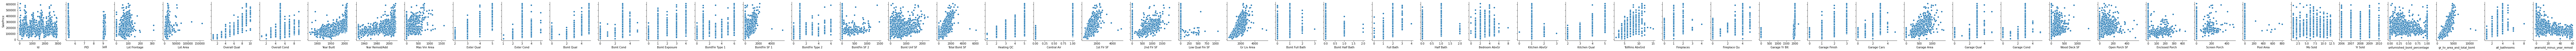

In [214]:

sns.pairplot(ames_housing, x_vars=['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold',
       'unfurnished_bsmt_percentage', 'gr_liv_area_and_total_bsmt',
       'all_bathrooms', 'yearsold_minus_year_remod'],
                                    y_vars=['SalePrice']);

In [215]:
ames_housing._get_numeric_data().columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'unfurnished_bsmt_percentage', 'gr_liv_area_and_total_bsmt',
       'all_bathrooms', 'yearsold_minus_year_remod'],
      dtype='object')

In [216]:
# Overall Qual, Gr Liv Area, Kitchen Qual, 2nd Flr SF, Garage Area, Garage Cars, all_bathrooms, Bsmt Qual,
# Total Bsmt SF, 1st Flr SF, Year Built, Year Remod/Add, Full Bath, Garage Yr Blt, Mas Vnr Area, TotRms AbvGrd
# Exter Qual, gr_live_area_and_total_bsmt

features = ['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold',
       'unfurnished_bsmt_percentage', 'gr_liv_area_and_total_bsmt',
       'all_bathrooms', 'yearsold_minus_year_remod']
# Exter Qual, gr_live_area_and_total_bsmt]
X = ames_housing[features]
y = ames_housing['SalePrice']

In [217]:
ames_housing[features].isnull().sum()

Id                             0
PID                            0
Lot Frontage                   0
Lot Area                       0
Overall Qual                   0
Overall Cond                   0
Year Built                     0
Year Remod/Add                 0
Mas Vnr Area                   0
Exter Qual                     0
Exter Cond                     0
Bsmt Qual                      0
Bsmt Cond                      0
Bsmt Exposure                  0
BsmtFin Type 1                 0
BsmtFin SF 1                   0
BsmtFin Type 2                 0
BsmtFin SF 2                   0
Bsmt Unf SF                    0
Total Bsmt SF                  0
Heating QC                     0
Central Air                    0
1st Flr SF                     0
2nd Flr SF                     0
Low Qual Fin SF                0
Gr Liv Area                    0
Bsmt Full Bath                 0
Bsmt Half Bath                 0
Full Bath                      0
Half Bath                      0
Bedroom Ab

In [218]:
X.shape

(2051, 53)

In [219]:
y.shape

(2051,)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [221]:
lr = LinearRegression()

In [222]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.766865486830986

In [223]:
lr.fit(X_train, y_train);

print('train', lr.score(X_train, y_train))

print('test', lr.score(X_test, y_test))

print('cv', cross_val_score(lr, X_train, y_train, cv=5).mean())

train 0.8391559313130674
test 0.8853687964337822
cv 0.766865486830986


In [224]:
lr.predict(X)

array([190784.46891947, 244278.24317549, 120774.03616348, ...,
       156746.59902261, 124193.45699099, 181095.96420643])

In [225]:
test_data = pd.read_csv("../datasets/test.csv")

In [226]:
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [227]:
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].map(poor_to_excellent)

In [228]:
# test_for_predicting = test_data[features]
# test_for_predicting.head()

In [229]:
predictions = lr.predict(test_for_predicting)
predictions[:5]

NameError: name 'test_for_predicting' is not defined

In [ ]:
submission = test_data[['Id']].copy()
submission.head()

In [ ]:
submission['SalePrice'] = predictions
submission.head()

In [ ]:
test_data.shape

In [ ]:
submission.shape

In [ ]:
submission.to_csv('../datasets/submission.csv', index=False)